https://datascienceschool.net/view-notebook/ea4584bde04140368950ee50ef038833/

In [0]:
import scipy as sp
a= 2
b= 6
rv_p = sp.stats.beta(a,b)
rv_q = sp.stats.norm(loc=0.5, scale=0.5)
k= 5

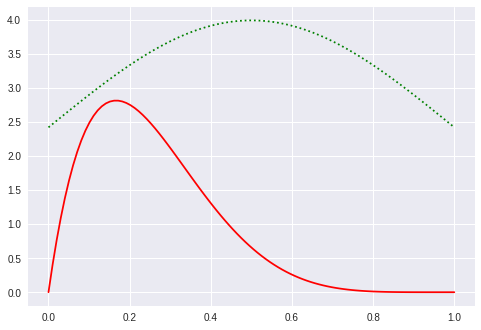

In [6]:
import numpy as np
import matplotlib.pyplot as plt
xx =np.linspace(0,1, 100)
plt.plot(xx, rv_p.pdf(xx) ,"r-")
plt.plot(xx, rv_q.pdf(xx)*k , "g:")
plt.show()


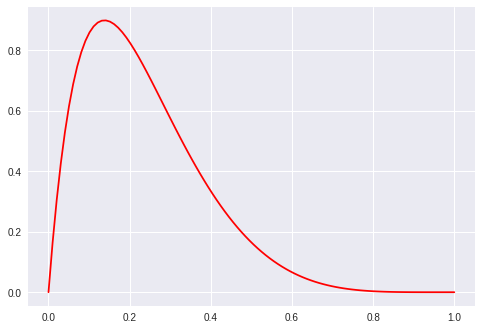

In [7]:
plt.plot(xx , rv_p.pdf(xx)/ (rv_q.pdf(xx) *k), "r-")
plt.show()

In [21]:
np.random.seed(1)
x_q0 = rv_q.rvs(int(1e4))
print(x_q0[:5])
print("================")
x_q = x_q0[(x_q0 >= 0) & (x_q0 <=1 )]
crits = rv_p.pdf(x_q) / (rv_q.pdf(x_q) * k )
coins = np.random.rand(len(x_q))

x_p = x_q[coins <crits]

print(coins <crits)
len(x_p)

[ 1.31217268  0.19412179  0.23591412 -0.03648431  0.93270381]
[False  True False ... False False False]


1982

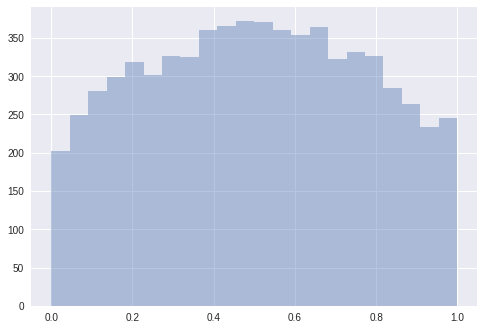

In [23]:
import seaborn as sns
sns.distplot(x_q , kde= False)
plt.show()

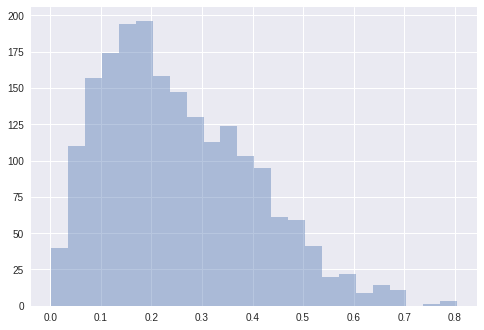

In [24]:
sns.distplot(x_p , kde=False)
plt.show()

6858


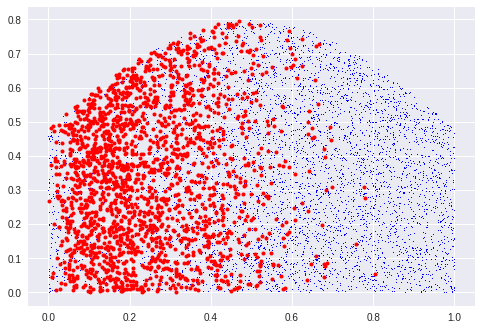

1982


In [27]:
print(len(x_q))
y = np.random.rand(len(x_q)) * rv_q.pdf(x_q)
plt.plot(x_q, y, 'bs', ms=1)
ids = coins < crits
plt.plot(x_q[ids], y[ids], 'ro', ms=4)
plt.show()
print(len(x_q[ids]))



In [0]:
!pip install -q pymc3
import pymc3 as pm

In [29]:
import numpy as np
cov = np.array([[1. , 1.5], [1.5, 4]])
mu = np.array([1, -1])

with pm.Model() as model :
    x = pm.MvNormal("x", mu=mu, cov=cov, shape=(1,2))
    step = pm.Metropolis()
    trace = pm.sample(50000, step)

Sequential sampling (2 chains in 1 job)
Metropolis: [x]
100%|██████████| 50500/50500 [00:13<00:00, 3750.26it/s]
/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))
The number of effective samples is smaller than 10% for some parameters.


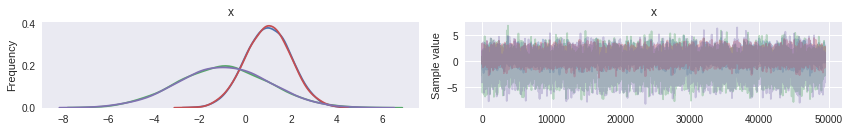

In [30]:
import matplotlib.pyplot as plt
pm.traceplot(trace , skip_first=500)
plt.show()

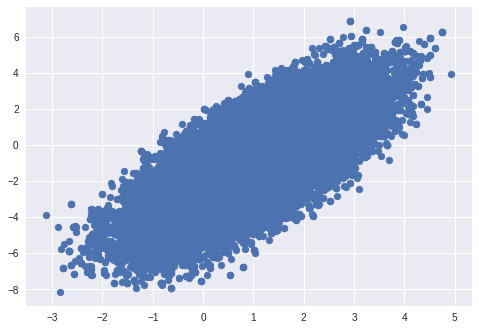

In [31]:
plt.scatter(trace["x"][500: , 0, 0] , trace["x"][500:, 0,1])
plt.show()

In [32]:
import scipy as sp
theta0 = 0.7
np.random.seed(0)
x_data1 = sp.stats.bernoulli(theta0).rvs(10)
x_data1

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [33]:
with pm.Model() as model :
    theta = pm.Beta("theta", alpha =1, beta=1)
    x = pm.Bernoulli("x", p=theta , observed =x_data1 )
    start = pm.find_MAP()
    step = pm.NUTS()
    trace2 = pm.sample(1000 , step = step , start=start)

logp = -6.9315, ||grad|| = 2: 100%|██████████| 6/6 [00:00<00:00, 500.25it/s]
Sequential sampling (2 chains in 1 job)
NUTS: [theta_logodds__]
100%|██████████| 1500/1500 [00:00<00:00, 2198.78it/s]
/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b521d04a8>,
      dtype=object)

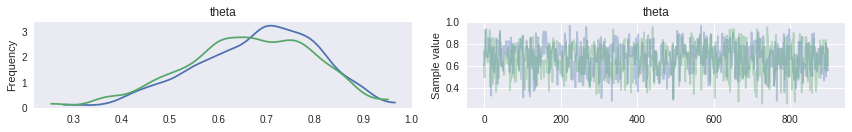

In [34]:
pm.traceplot(trace2, skip_first=100) 

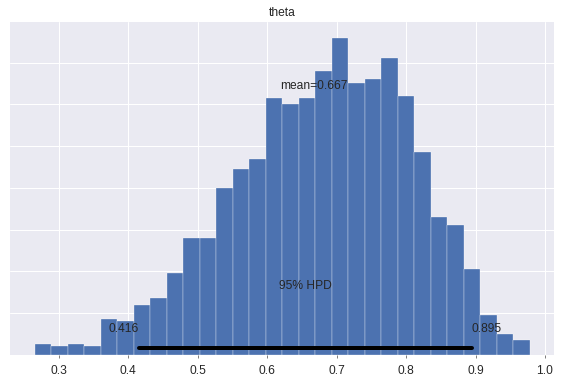

In [35]:
pm.plot_posterior(trace2)
plt.show()

In [36]:
pm.summary(trace2)

/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
theta,0.667273,0.12816,0.003968,0.415721,0.894622,964.046259,1.005026


In [37]:
print(pm.df_summary(trace2))

AttributeError: ignored

In [0]:
import seaborn as sns
sns.distplot(trace1["theta"])
sns.distplot(trace2["theta"])
plt.ylim(0, 20)
plt.show()

## Bayesian Linear Regression using MCMC¶

In [39]:
from sklearn.datasets import make_regression

x, y_data, coef = make_regression(n_samples =100, n_features =1, bias=0 , noise = 20, coef=True , random_state =1)
x = x.flatten()
coef

array(80.71051956)

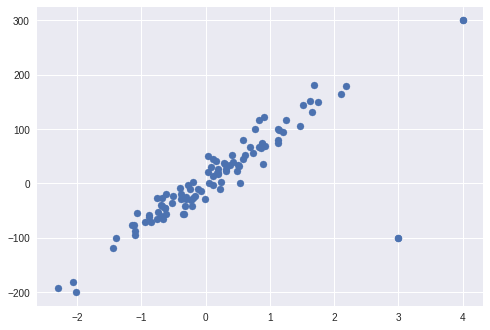

In [41]:
# leverage 높은 가상의 데이터를 추가
data_100 = (4, 300)
data_101 = (3, -100)
x =np.hstack([x, [data_100[0],data_101[0]]])
y_data = np.hstack([y_data, [data_100[1], data_101[1]]])

plt.scatter(x, y_data)
plt.show()

In [44]:
with pm.Model() as m :
    w = pm.Normal("w", mu=0, sd=50)
    b = pm.Normal("b", mu=0, sd=50)
    mu = pm.Deterministic('mu', w * x + b)
    esd = pm.HalfCauchy("esd", 5)
    y= pm.Normal("y", mu=mu, sd=esd, observed = y_data)
    
    start = pm.find_MAP()
    step = pm.NUTS()
    trace1 = pm.sample(10000, step=step, start=start)

logp = -567.54, ||grad|| = 5.7918: 100%|██████████| 38/38 [00:00<00:00, 1355.76it/s]  
Sequential sampling (2 chains in 1 job)
NUTS: [esd_log__, b, w]
100%|██████████| 10500/10500 [00:07<00:00, 1402.92it/s]
/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


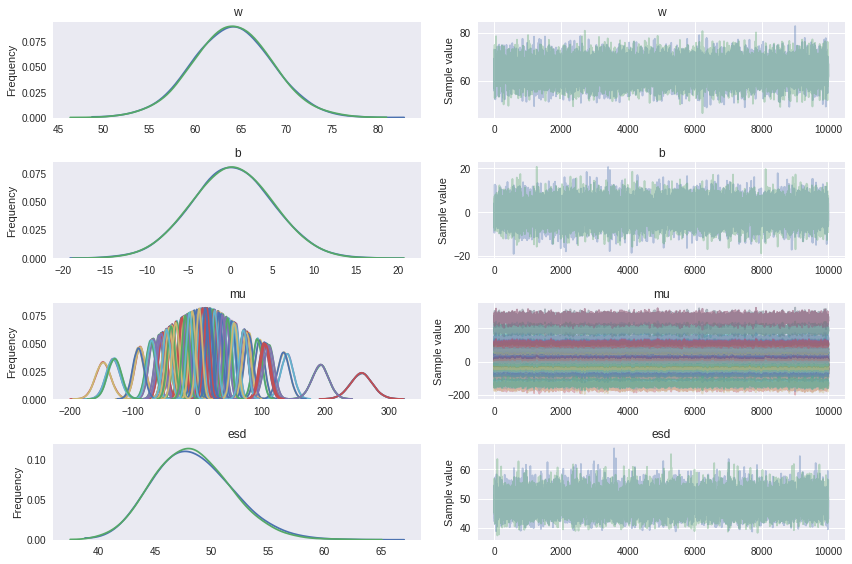

In [45]:
pm.traceplot(trace1)
plt.show()

In [47]:
import pandas as pd
import statsmodels.api as sm
model = sm.OLS.from_formula("y~x", data= pd.DataFrame({"x" : x ,"y": y_data}))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     224.2
Date:                Fri, 27 Apr 2018   Prob (F-statistic):           1.68e-27
Time:                        10:12:43   Log-Likelihood:                -549.62
No. Observations:                 104   AIC:                             1103.
Df Residuals:                     102   BIC:                             1109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0890      4.800      0.019      0.9

##  Robust Bayesian Regression¶

In [49]:
with pm.Model() as m :
    w = pm.Normal("w", mu=0 , sd= 50)
    b = pm.Normal("b", mu=0, sd=50)
    mu = pm.Deterministic("mu",w*x+b )
    esd = pm.HalfCauchy("esd",5 )
    y =pm.StudentT("y", mu=mu, sd=esd , nu=3, observed=y_data)
    
    start = pm.find_MAP()
    step = pm.NUTS()
    trace2 = pm.sample(10000, step=step, start =start)
   
    

logp = -486.76, ||grad|| = 3.5028: 100%|██████████| 37/37 [00:00<00:00, 1491.47it/s]  
Sequential sampling (2 chains in 1 job)
NUTS: [esd_log__, b, w]
100%|██████████| 10500/10500 [00:07<00:00, 1397.56it/s]
/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


In [50]:
ids = np.argsort(x)
print(ids[:100])

confint1 = pm.df_summary(trace1)[['hpd_2.5', 'hpd_97.5']]['mu__0':'mu__101'].values
confint2 = pm.df_summary(trace2)[['hpd_2.5', 'hpd_97.5']]['mu__0':'mu__101'].values


plt.scatter(x, y_data)
plt.fill_between(x[ids], confint1[ids, 0], confint1[ids, 1], color='red', alpha=0.25)
plt.fill_between(x[ids], confint2[ids, 0], confint2[ids, 1], color='green', alpha=0.25)
plt.show()

[38 81 89 70  8 65 69 12 14 19 67 31 43 42 62 29 87 54 74 25  7 18 77 10
 68  0 92 35 11 24 48 17 30 36 44 20 95 91  1 71 50 57 99 83 86 16 76 98
 97 26 75 61 51 84 46 66 32 94 23 90 82 88 64  9 53  5 60 63  2 49  6 58
 27 52 73 55 59  3 15 34 22 33 45 13 80 39 93 47 78 85 56 28 41  4 72 96
 37 79 40 21]


AttributeError: ignored